# The BAK–TANG–WIESENFELD Sandpile

[source](http://93.174.95.29/_ads/F7595E1E9FFC863A0D77117778C3E77C)
page 85

## General features

+ First published by Bak, Tang, and Wiesenfeld (1987).
+ Motivated by avalanching behaviour of a real sandpile.
+ In one dimension rules represent downward movement of sand grains.
+ Defined in any dimension, exactly solved (trivial) in one.
+ Stochastic (bulk) drive, deterministic relaxation.
+ Non-Abelian in its original definition.
+ Many results actually refer to Dhar’s (1990a) Abelian sandpile, Sec. 4.2.
+ Simple scaling behaviour disputed, multiscaling proposed.
+ Exponents listed in Table 4.1, p. 92, are for the Abelian BTW Model.

## Rules

+ d dimensional (usually) hyper-cubic lattice and q the coordination number (on cubic lattices q = 2d).
+ Choose (arbitrary) critical slope z^c = q − 1.
+ Each site n ∈ {1,..., L}^d has slope z_n.
+ _Initialisation_: irrelevant, model studied in the stationary state.
+ _Driving_: add a grain at n0 chosen at random and update all uphill nearest neighbours n'0 of n0:
z_n0 →z_n0 + q/2
z_n0 →z_n'0 − 1.
+ _Toppling_: for each site n with z_n > z^c distribute q grains among its nearest neighbours n'
:
z_n →z_n − q
∀n'.nn.n z_n →z_n + 1.
In one dimension site n = L relaxes according to 
z_L → z_L − 1
z_L−1 → z_L−1 + 1.
+ _Dissipation_: grains are lost at open boundaries.
+ _Parallel update_: discrete microscopic time, sites exceeding zc at time t topple at t + 1 (updates in
sweeps).
+ _Separation of time scales_: drive only once all sites are stable, i.e. z_n ≤ z^c (quiescence).
+ _Key observables_ (see Sec. 1.3):
avalanche sizes, the total number of topplings until quiescence;
avalanche duration T , the total number of parallel updates until quiescence


In [4]:
from SOC.models import BTW

## Empty model

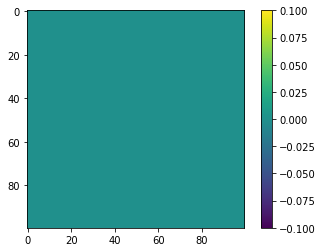

In [5]:
b = BTW(100)
b.plot_state();

## Running model

In [6]:
b.run(30)

100%|██████████| 30/30 [00:02<00:00, 14.70it/s]


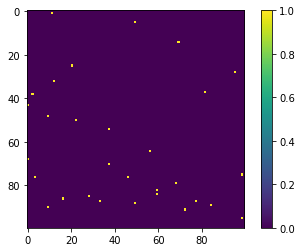

In [7]:
b.plot_state();

In [12]:
b.run(1000000)

 10%|▉         | 95690/1000000 [01:32<20:50, 723.06it/s]

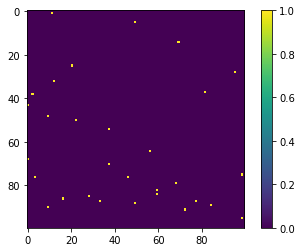

In [8]:
b.plot_state();

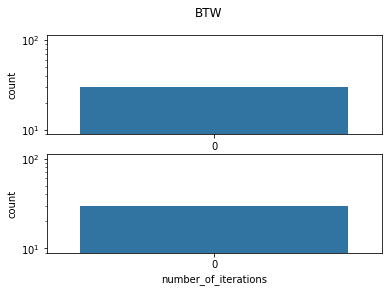

In [11]:
b.plot_histograms()

## Uniform model load

In [3]:
b2 = BTW(10)
b2.values[1:-1,1:-1] = 5

In [4]:
b2.AvalancheLoop()

{'AvalancheSize': 140, 'number_of_iterations': 26}

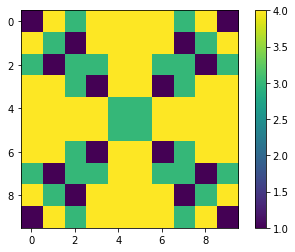

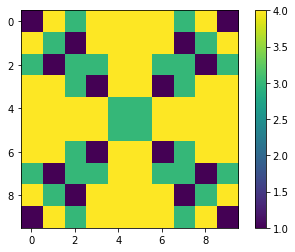

In [5]:
b2.plot_state()

In [16]:
b2 = BTW(50)
b2.values[1:-1,1:-1] = 40

In [17]:
b2.AvalancheLoop()

{'AvalancheSize': 2700, 'number_of_iterations': 7360}

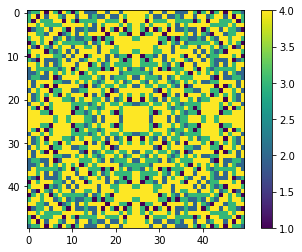

In [18]:
b2.plot_state();